In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




In [ ]:
df=pd.read_csv('/content/globalterrorismdb_shorter.csv',encoding = "ISO-8859-1")

In [ ]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,201612310040,2016,12,31,0,146,Niger,11,Sub-Saharan Africa,Diffa,...,15.0,12.0,7.0,0.0,0,NaN,NaN,0.0,NaN,START Primary Collection
170346,201612310042,2016,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,0.0,0.0,-9,NaN,NaN,0.0,NaN,START Primary Collection
170347,201612310043,2016,12,31,1,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,Bas-Uele,...,0.0,0.0,NaN,0.0,0,NaN,NaN,1.0,33.0,START Primary Collection
170348,201612310044,2016,12,31,0,130,Mexico,1,North America,Chihuahua,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           170350 non-null  int64  
 1   iyear             170350 non-null  int64  
 2   imonth            170350 non-null  int64  
 3   iday              170350 non-null  int64  
 4   extended          170350 non-null  int64  
 5   country           170350 non-null  int64  
 6   country_txt       170350 non-null  object 
 7   region            170350 non-null  int64  
 8   region_txt        170350 non-null  object 
 9   provstate         155848 non-null  object 
 10  city              169904 non-null  object 
 11  latitude          165744 non-null  float64
 12  longitude         165744 non-null  float64
 13  specificity       170346 non-null  float64
 14  vicinity          170350 non-null  int64  
 15  location          47974 non-null   object 
 16  summary           10

In [ ]:
df_USA = df[df.country == 217]


In [ ]:
df_USA

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,Hewitt Project
10,197001050001,1970,1,1,0,217,United States,1,North America,Wisconsin,...,0.0,NaN,0.0,NaN,0,3.0,Minor (likely < $1 million),0.0,NaN,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169258,201611250026,2016,11,25,0,217,United States,1,North America,Washington,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
169350,201611280001,2016,11,28,0,217,United States,1,North America,Ohio,...,1.0,1.0,11.0,0.0,0,NaN,NaN,0.0,NaN,START Primary Collection
169621,201612040047,2016,12,4,0,217,United States,1,North America,District of Columbia,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
169726,201612080038,2016,12,7,0,217,United States,1,North America,California,...,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection


In [ ]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           2758 non-null   int64  
 1   iyear             2758 non-null   int64  
 2   imonth            2758 non-null   int64  
 3   iday              2758 non-null   int64  
 4   extended          2758 non-null   int64  
 5   country           2758 non-null   int64  
 6   country_txt       2758 non-null   object 
 7   region            2758 non-null   int64  
 8   region_txt        2758 non-null   object 
 9   provstate         2758 non-null   object 
 10  city              2758 non-null   object 
 11  latitude          2757 non-null   float64
 12  longitude         2757 non-null   float64
 13  specificity       2758 non-null   float64
 14  vicinity          2758 non-null   int64  
 15  location          906 non-null    object 
 16  summary           1704 non-null   object

In [ ]:
df_USA = df_USA.drop([ 'region', 'country', 'country_txt','claimed', 'nkillter', 'nwoundte'],axis=1)

In [ ]:
df_USA.tail()

,eventid,iyear,imonth,iday,extended,region_txt,provstate,city,latitude,longitude,...,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
169258,201611250026,2016,11,25,0,North America,Washington,Tacoma,47.154901,-122.368098,...,18.0,Arson/Fire,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
169350,201611280001,2016,11,28,0,North America,Ohio,Columbus,40.003290,-83.011421,...,23.0,Knife or Other Sharp Object,1.0,11.0,0,NaN,NaN,0.0,NaN,START Primary Collection
169621,201612040047,2016,12,4,0,North America,District of Columbia,Washington,38.955943,-77.069984,...,2.0,Automatic Weapon,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
169726,201612080038,2016,12,7,0,North America,California,Redlands,34.053546,-117.181537,...,18.0,Arson/Fire,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,START Primary Collection
169902,201612150044,2016,12,15,0,North America,Texas,Dallas,32.776664,-96.796988,...,NaN,NaN,0.0,1.0,0,NaN,NaN,0.0,NaN,START Primary Collection


In [ ]:
df_USA.describe()

,eventid,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,nperpcap,compclaim,weaptype1,weapsubtype1,nkill,nwound,property,propextent,ishostkid,nhostkid
count,2.758000e+03,2758.000000,2758.000000,2758.000000,2758.000000,2757.000000,2757.000000,2758.000000,2758.000000,2758.000000,...,1703.000000,131.000000,2758.000000,2499.000000,2685.000000,2665.000000,2758.000000,1567.000000,2582.000000,62.000000
mean,1.983206e+11,1983.142132,6.235678,15.279913,0.004714,36.685013,-91.845078,1.020667,0.015591,0.988397,...,-54.896653,-4.679389,6.609500,15.384554,1.358659,6.789869,0.385062,3.128909,0.024012,-7.064516
std,1.335005e+09,13.347349,3.396045,9.151050,0.068506,7.375534,21.866017,0.245246,0.123909,0.107108,...,49.799137,4.581345,1.597562,6.041339,38.059681,202.717081,1.931270,0.440568,0.153117,51.861060
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,17.966072,-157.858333,1.000000,0.000000,0.000000,...,-99.000000,-9.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,-99.000000
25%,1.971101e+11,1971.000000,3.000000,7.000000,0.000000,34.053490,-117.867834,1.000000,0.000000,1.000000,...,-99.000000,-9.000000,6.000000,15.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,1.978100e+11,1978.000000,6.000000,15.000000,0.000000,38.890370,-84.511981,1.000000,0.000000,1.000000,...,-99.000000,-9.000000,6.000000,16.000000,0.000000,0.000000,1.000000,3.000000,0.000000,2.000000
75%,1.992082e+11,1992.000000,9.000000,23.000000,0.000000,40.783060,-74.005941,1.000000,0.000000,1.000000,...,1.000000,0.000000,8.000000,18.000000,0.000000,0.000000,1.000000,3.000000,0.000000,9.750000
max,2.016122e+11,2016.000000,12.000000,31.000000,1.000000,64.837778,105.270546,5.000000,1.000000,1.000000,...,11.000000,1.000000,13.000000,30.000000,1383.000000,7366.000000,1.000000,4.000000,1.000000,135.000000


In [ ]:
df_USA['nkill'].fillna(1.361194, inplace=True)
df_USA['nwound'].fillna(6.802632, inplace=True)
df_USA['latitude'].fillna(36.683652, inplace=True)
df_USA['longitude'].fillna(-92.125972, inplace=True)
df_USA["natlty1"].fillna(217, inplace=True)
df_USA["natlty1_txt"].fillna("United States", inplace=True)
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           2758 non-null   int64  
 1   iyear             2758 non-null   int64  
 2   imonth            2758 non-null   int64  
 3   iday              2758 non-null   int64  
 4   extended          2758 non-null   int64  
 5   region_txt        2758 non-null   object 
 6   provstate         2758 non-null   object 
 7   city              2758 non-null   object 
 8   latitude          2758 non-null   float64
 9   longitude         2758 non-null   float64
 10  specificity       2758 non-null   float64
 11  vicinity          2758 non-null   int64  
 12  location          906 non-null    object 
 13  summary           1704 non-null   object 
 14  crit1             2758 non-null   int64  
 15  crit2             2758 non-null   int64  
 16  crit3             2758 non-null   int64 

In [ ]:
df_USA.corr()


<ipython-input-12-640ce080bd12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_USA.corr()


,eventid,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,nperpcap,compclaim,weaptype1,weapsubtype1,nkill,nwound,property,propextent,ishostkid,nhostkid
eventid,1.000000,0.999997,0.082377,-0.031618,0.037313,0.044058,-0.046173,-0.004415,0.063089,-0.187996,...,0.589081,-0.607074,0.130177,-0.081009,0.043413,0.039825,0.042386,-0.152943,0.005329,0.054634
iyear,0.999997,1.000000,0.079848,-0.031732,0.037348,0.044106,-0.046357,-0.004444,0.063138,-0.188117,...,0.589015,-0.607292,0.130232,-0.080916,0.043365,0.039777,0.042383,-0.152976,0.005270,0.054053
imonth,0.082377,0.079848,1.000000,0.014812,-0.011013,-0.015176,0.067120,0.011134,-0.013907,0.032449,...,0.118500,0.297230,-0.012380,-0.043924,0.022700,0.022196,0.003634,-0.000991,0.024694,0.205078
iday,-0.031618,-0.031732,0.014812,1.000000,-0.003841,-0.018201,0.024961,-0.005811,-0.007689,0.012566,...,-0.031134,0.128094,0.019314,-0.005687,-0.013013,-0.011213,0.036567,-0.014968,-0.007743,-0.105051
extended,0.037313,0.037348,-0.011013,-0.003841,1.000000,0.012159,-0.005018,-0.005800,0.034069,0.007456,...,0.062407,NaN,-0.039517,-0.057557,-0.001785,-0.002213,-0.021948,-0.041607,0.203308,0.174336
latitude,0.044058,0.044106,-0.015176,-0.018201,0.012159,1.000000,-0.260438,-0.095160,-0.000921,-0.009850,...,0.179936,-0.199750,0.052501,0.053650,0.013285,0.015616,0.040239,-0.125047,-0.011668,0.020434
longitude,-0.046173,-0.046357,0.067120,0.024961,-0.005018,-0.260438,1.000000,0.040516,-0.031834,-0.003910,...,-0.112451,-0.138912,-0.059572,-0.074996,0.023425,0.020996,-0.016782,0.039263,0.046484,0.059441
specificity,-0.004415,-0.004444,0.011134,-0.005811,-0.005800,-0.095160,0.040516,1.000000,0.061008,0.009132,...,-0.054027,0.089927,0.026161,-0.019012,-0.002450,-0.002374,0.013058,0.053496,0.021623,-0.228827
vicinity,0.063089,0.063138,-0.013907,-0.007689,0.034069,-0.000921,-0.031834,0.061008,1.000000,0.013635,...,0.030685,-0.044300,0.082072,0.006506,-0.000707,-0.003693,0.011280,-0.072613,0.059828,0.102432
crit1,-0.187996,-0.188117,0.032449,0.012566,0.007456,-0.009850,-0.003910,0.009132,0.013635,1.000000,...,-0.134777,NaN,0.068900,0.057131,0.000404,0.000566,0.002318,-0.031261,-0.028163,-0.126225


<ipython-input-13-75257cff839b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_USA.corr()


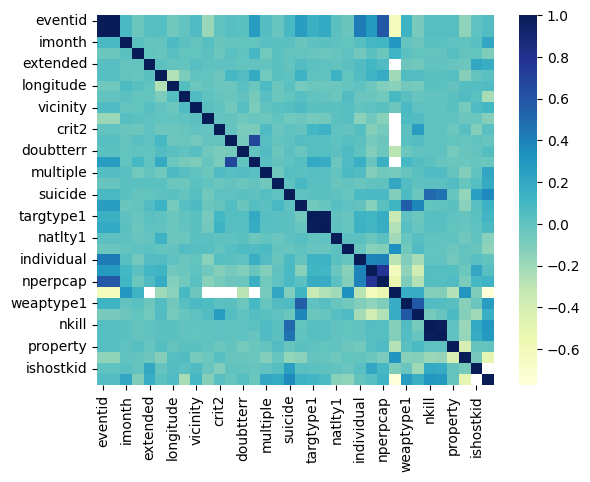

In [ ]:
correlation = df_USA.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=False)
plt.savefig("correlation.pdf", dpi=300, format="pdf")
plt.show()

<ipython-input-14-458f393258d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_USA.corrwith(df_USA['success'])


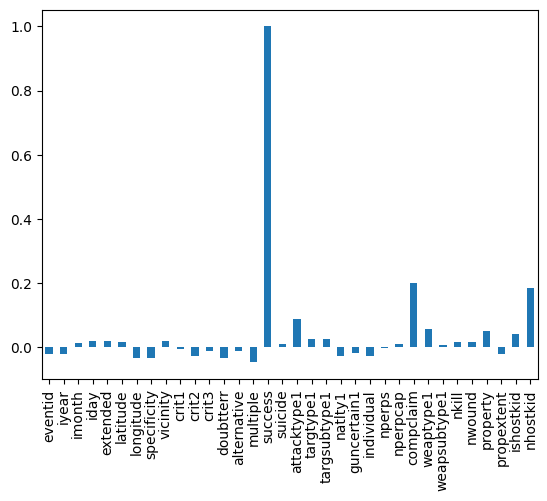

<Figure size 5000x800 with 0 Axes>

In [ ]:
correlations = df_USA.corrwith(df_USA['success'])
correlations.plot(kind='bar')
plt.figure(figsize=(50, 8))
plt.savefig('correlation_btw_result.pdf', dpi = 300, format = 'pdf')
plt.show()

In [ ]:
df_USA = df_USA.drop(["iyear","attacktype1_txt","targtype1_txt", "weaptype1_txt", "natlty1_txt"], axis=1)

In [ ]:
y = df_USA["success"]
features_success = ['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'natlty1','individual', 'weaptype1', 'nkill', 'nwound']
X = df_USA[features_success]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler=scaler.transform(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_val)
accuracy=accuracy_score(y_val,y_pred)
print('Accuracy',accuracy)

Accuracy 0.6793478260869565


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


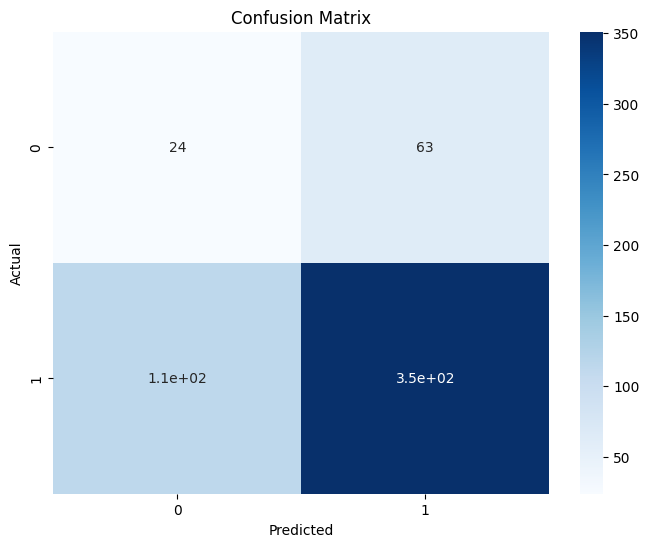

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("conf_matrix.pdf", dpi=300, format="pdf")
plt.show()

# LAB 02

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for i in df_USA.columns:
    df_USA[i] = le.fit_transform(df_USA[i])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

,Feature,Variance
6,suicide,0.003099
2,extended,0.004128
10,individual,0.078183
5,multiple,0.135174
11,weaptype1,2.622589
7,attacktype1,4.541626
0,imonth,11.000000
8,targtype1,21.000000
1,iday,31.000000
3,latitude,46.865228


Feature 0 : 0.135
Feature 1 : 0.014
Feature 2 : 1.614
Feature 3 : 0.054
Feature 4 : 4.216
Feature 5 : 3.301
Feature 6 : 0.0
Feature 7 : 16.324
Feature 8 : 0.607
Feature 9 : 0.035
Feature 10 : 1.379
Feature 11 : 7.718
Feature 12 : 0.428
Feature 13 : 0.386



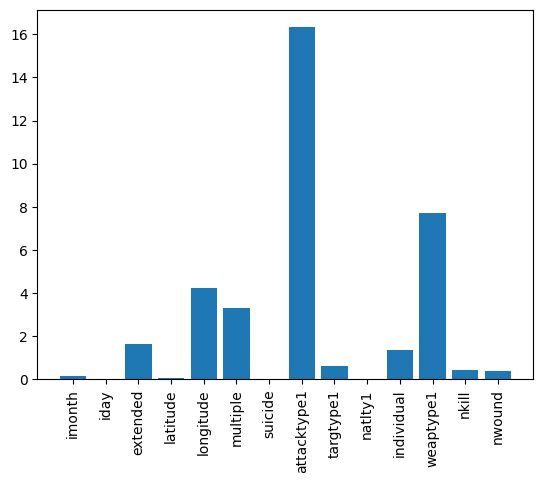

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

Kbest_classif = SelectKBest(score_func=f_classif, k=6)   # score_func=f_regression, ,, for regreassion problem
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

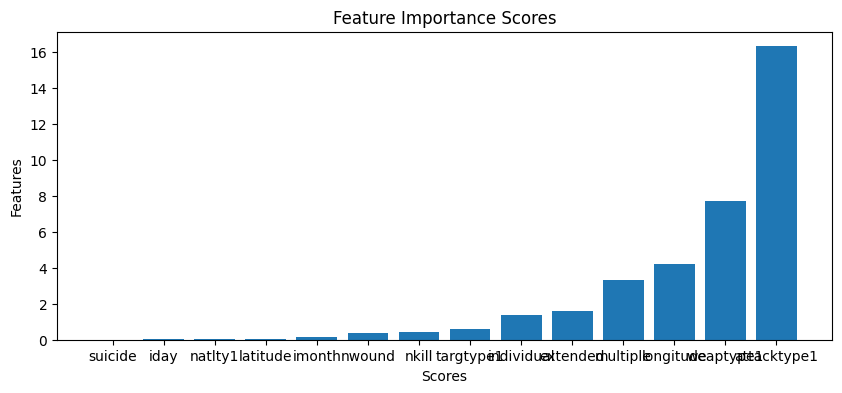

In [ ]:
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))],Kbest_classif.scores_)),key=lambda x:x[1])

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
plt.bar(features, scores)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (1930, 14)

X_train_selected.shape: (1930, 6)



In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

#In this example, by using only 6 features of the dataset, we got not better score than by using whole features.

Score with all features: 0.8043
Score with only selected features: 0.8056


Feature 0 : 0.0
Feature 1 : 0.015
Feature 2 : 0.002
Feature 3 : 0.021
Feature 4 : 0.014
Feature 5 : 0.012
Feature 6 : 0.008
Feature 7 : 0.033
Feature 8 : 0.0
Feature 9 : 0.001
Feature 10 : 0.0
Feature 11 : 0.015
Feature 12 : 0.008
Feature 13 : 0.011



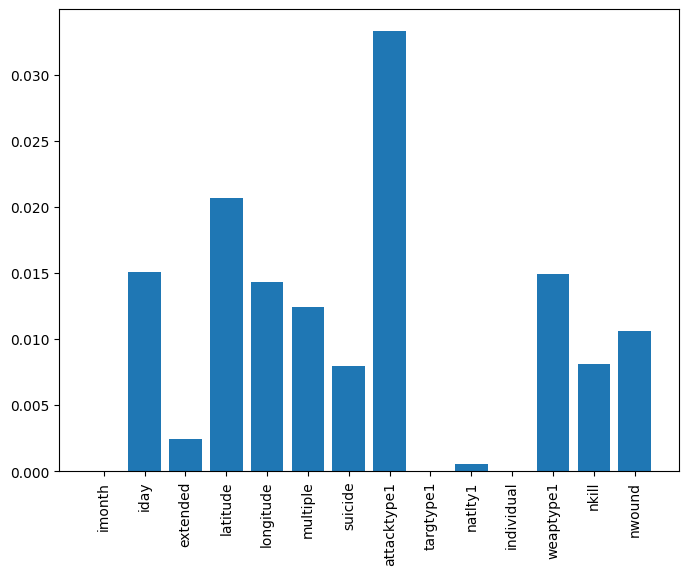

In [ ]:
from sklearn.feature_selection import mutual_info_classif

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [ ]:

from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
percentile.get_support()

array([False, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False])

In [ ]:
X_train.columns

Index(['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple',
       'suicide', 'attacktype1', 'targtype1', 'natlty1', 'individual',
       'weaptype1', 'nkill', 'nwound'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model_based_feature = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

model_based_feature.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [ ]:
model_based_feature.get_support()

array([ True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False])

In [ ]:
X_train.columns

Index(['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple',
       'suicide', 'attacktype1', 'targtype1', 'natlty1', 'individual',
       'weaptype1', 'nkill', 'nwound'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([ True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False])

In [ ]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=RandomForestClassifier() , step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 11
Best features : Index(['imonth', 'iday', 'latitude', 'longitude', 'multiple', 'attacktype1',
       'targtype1', 'natlty1', 'weaptype1', 'nkill', 'nwound'],
      dtype='object')


In [ ]:
df_corr = pd.DataFrame(df_USA.corrwith(df_USA['success']),columns='correlation'.split(','))


In [ ]:
df_corr

,correlation
eventid,-0.028908
imonth,0.013775
iday,0.017865
extended,0.017832
region_txt,NaN
provstate,-0.034659
city,0.005748
latitude,-0.000803
longitude,-0.036009
specificity,-0.038254


In [ ]:
df_corr.style.bar(color='green',subset=['correlation'])

,correlation
eventid,-0.028908
imonth,0.013775
iday,0.017865
extended,0.017832
region_txt,nan
provstate,-0.034659
city,0.005748
latitude,-0.000803
longitude,-0.036009
specificity,-0.038254


<Axes: >

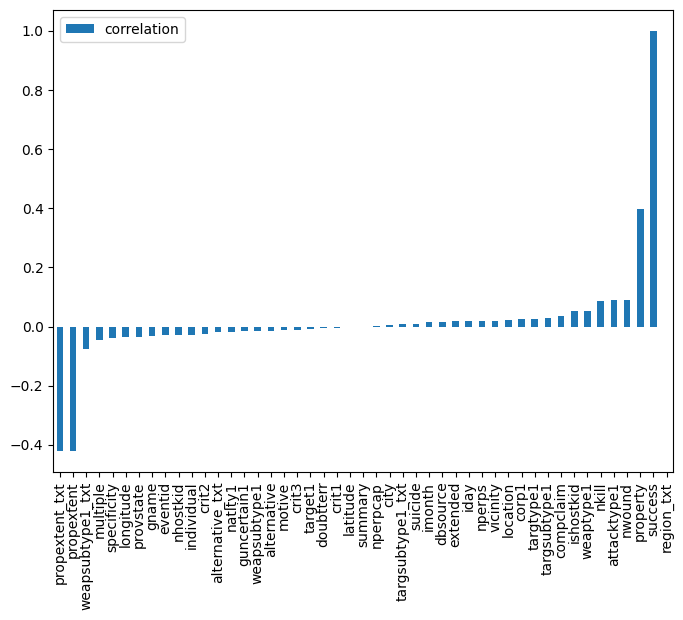

In [ ]:
df_corr.sort_values(by=['correlation'],ascending=True).plot(kind='bar')

In [ ]:


from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info   #now you know colum name and these value ,. make dataframe like above as i created also make plot

array([0.00172919, 0.        , 0.01370754, 0.01160427, 0.01245422,
       0.        , 0.00461637, 0.01310071, 0.        , 0.        ,
       0.        , 0.02380871, 0.0056439 , 0.01200805])

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values  #now you know colum name and these value ,. make dataframe like above as i created aslo make plot

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df_USA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 1.16084926, -0.17279347,  0.123849  ],
       [ 1.86268632,  2.47668969,  1.56165993],
       [ 1.70454731, -1.66588531,  0.96026074],
       ...,
       [ 1.24476834,  1.20068685, -1.55486365],
       [ 1.40597704, -0.85632876, -0.23117938],
       [-0.04308278,  0.46920019, -2.5740517 ]])

In [ ]:
print(pca.components_)

[[ 8.23482089e-02 -2.67130466e-02 -3.28386480e-02  9.51753643e-03
  -2.41379503e-20  2.58549677e-02 -6.99785925e-02  7.57320363e-02
  -7.48140930e-02 -1.22489650e-02  3.20778499e-02 -1.89597123e-01
  -3.19871050e-01 -3.64578322e-02 -5.92055434e-02  3.44772050e-02
   1.57249007e-01 -1.09009032e-01 -5.13968742e-02  1.11100500e-01
   6.26913832e-02  4.33222228e-02  2.02230861e-01  1.12877109e-02
  -1.10762676e-03  1.59760899e-02 -1.94225958e-01  3.02156544e-02
   8.58615084e-02 -1.32687943e-01 -2.51281471e-01  7.81154640e-02
   5.78240383e-02 -3.52214835e-01 -3.88622774e-01 -1.17457083e-01
   1.30505943e-01  3.62460133e-02 -2.46657109e-01  8.70396683e-03
   3.32827539e-03  5.45079859e-03 -2.74609403e-01 -2.74609403e-01
   7.44117000e-02  2.72121566e-03 -2.63702445e-01]
 [ 2.14218934e-02 -5.12917978e-03 -2.25405599e-02  4.57917557e-03
  -7.97058343e-20  2.09788007e-02  1.92814371e-02 -3.84704628e-02
   5.10228489e-02  3.05505350e-03  1.08248311e-02 -1.25422042e-02
  -7.18117656e-02 -1.4174

In [ ]:
print(sum(pca.explained_variance_ratio_))

0.24285446629406776


In [ ]:
import numpy as np
nums = np.arange(14)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

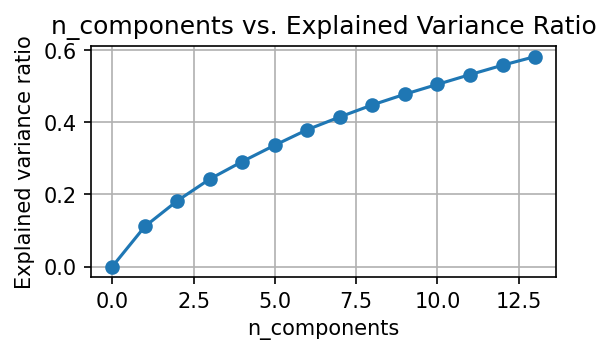

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
pip install sklearn-genetic-opt

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

X = np.hstack((X, noise))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)



In [ ]:
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.52243	0.137786   	0.870469   	0.329768   
1  	60    	0.674213	0.128886   	0.940285   	0.420083   
2  	60    	0.718548	0.122143   	0.940285   	0.440285   
3  	60    	0.732541	0.113602   	0.940285   	0.491087   
4  	60    	0.734314	0.149446   	0.930778   	0.380273   
5  	60    	0.747643	0.150473   	0.930778   	0.360368   
6  	60    	0.730372	0.145853   	0.930778   	0.450683   
7  	60    	0.781472	0.130904   	0.930778   	0.531194   
8  	60    	0.781838	0.146537   	0.930778   	0.490196   
9  	60    	0.733383	0.165004   	0.940285   	0.410873   
10 	60    	0.724708	0.142611   	0.940285   	0.510992   
11 	60    	0.742404	0.18251    	0.940285   	0.350267   
12 	60    	0.763102	0.162167   	0.940285   	0.430481   
13 	60    	0.78467 	0.151356   	0.940285   	0.459893   
14 	60    	0.73975 	0.167365   	0.96019    	0.40107    
15 	60    	0.779352	0.153203   	0.96019    	0.410873   
16 	60    	0.786304	0.141843   	0.96019    	0.4803

GAFeatureSelectionCV(estimator=SVC(gamma='auto'), generations=20, keep_top_k=2,
                     n_jobs=-1, population_size=30, scoring='accuracy')

In [ ]:
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)

In [ ]:
print (evolved_estimator.best_features_)
print("accuracy score: ", "{:.2f}".format (accuracy))

[False False  True  True False False False False False False False False
 False False]
accuracy score:  0.96


/usr/local/lib/python3.10/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


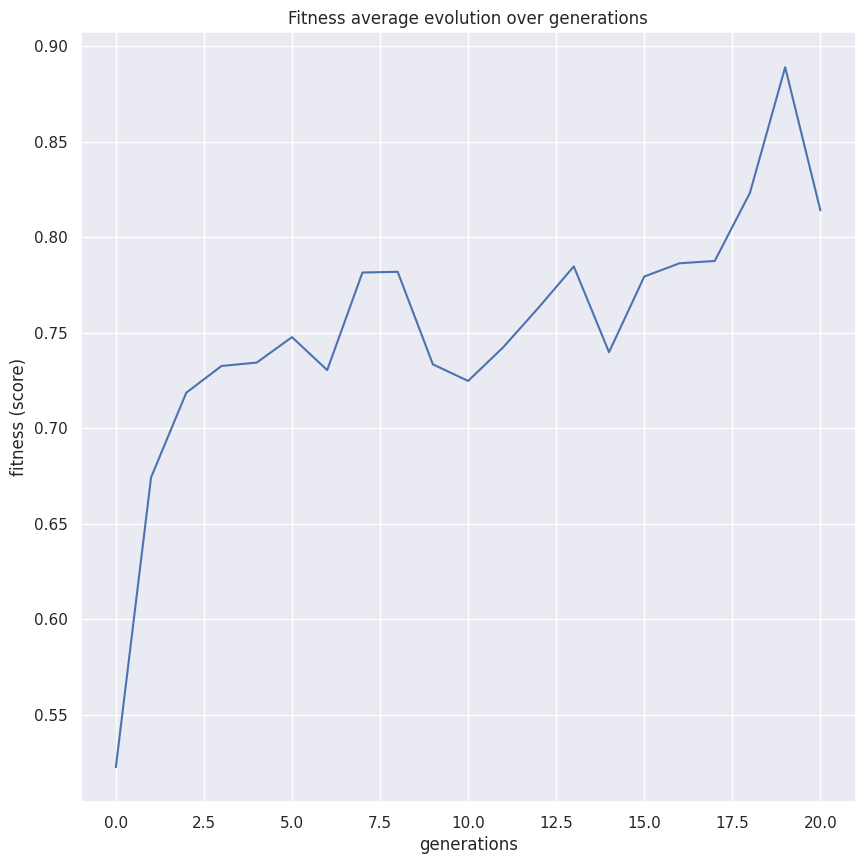

In [ ]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()

# LAB03

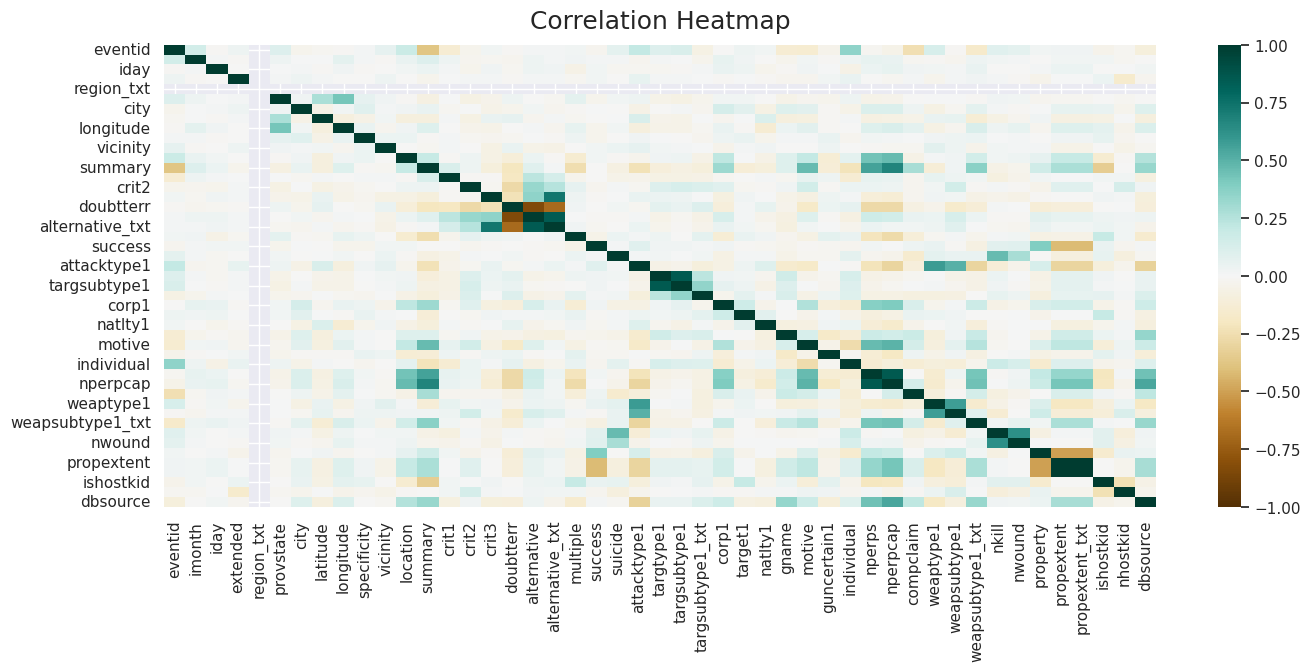

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_USA.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

<Axes: >

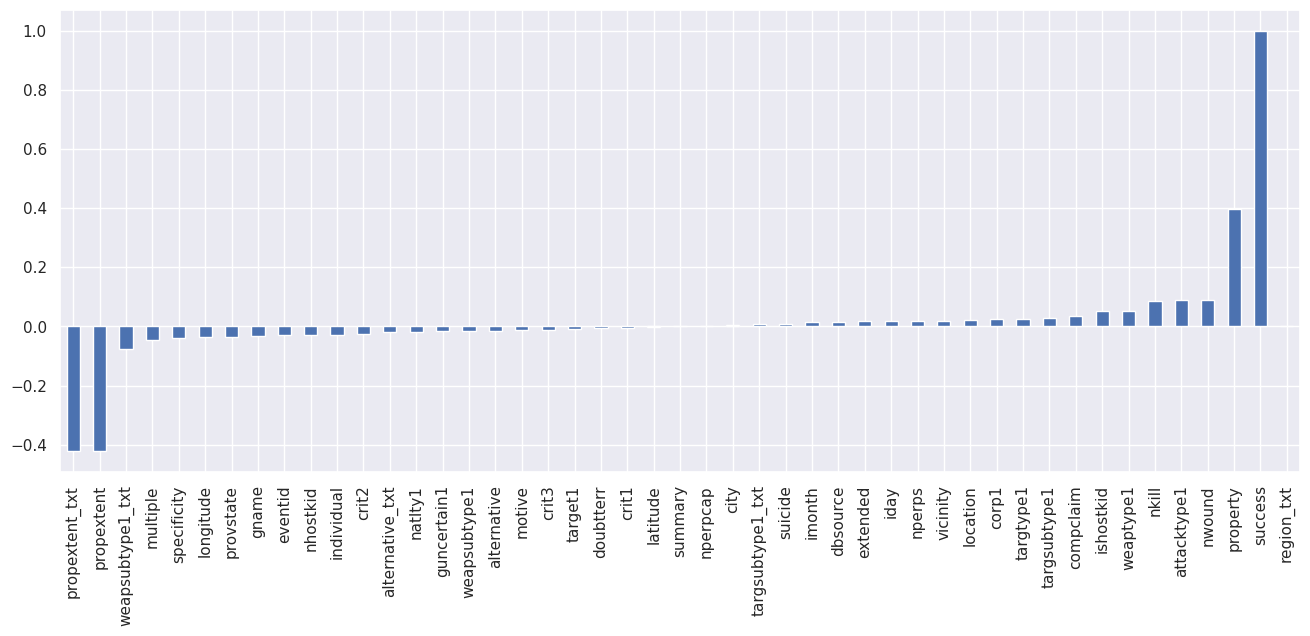

In [ ]:
df_USA.corrwith(df_USA['success']).sort_values(ascending=True).plot(kind='bar',figsize=(16, 6))

In [ ]:
y = df_USA["success"]
features_success = ['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'natlty1','individual', 'weaptype1', 'nkill', 'nwound']
X = df_USA[features_success]

[[ 23  22]
 [ 25 206]]


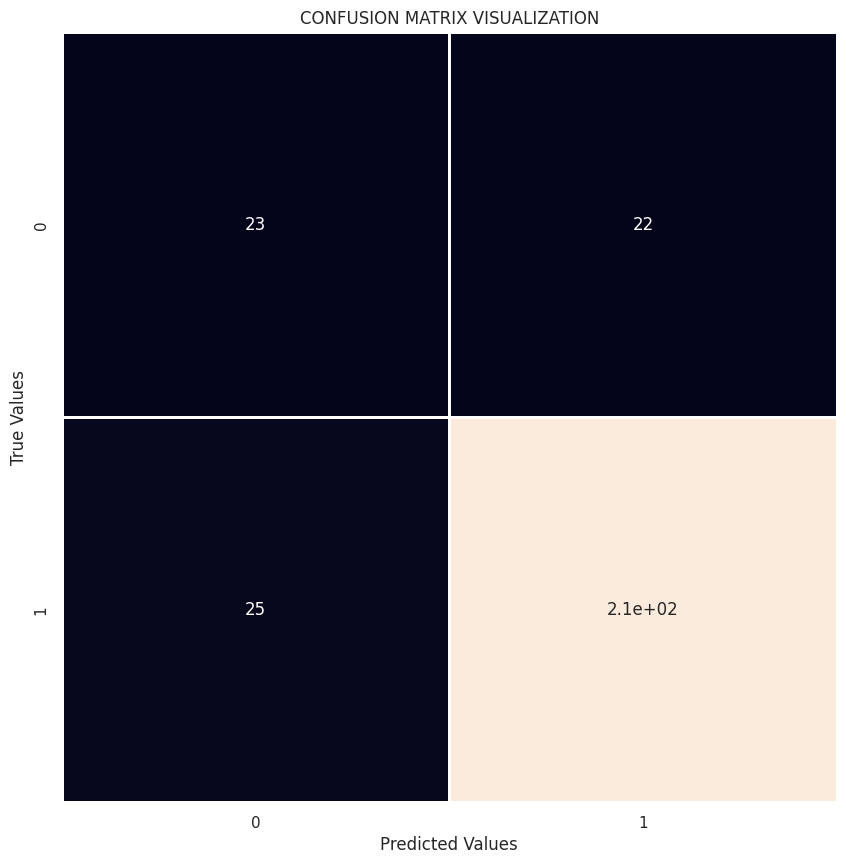

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(acc)


0.8297101449275363


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8976034858387799

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9035087719298246

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8917748917748918

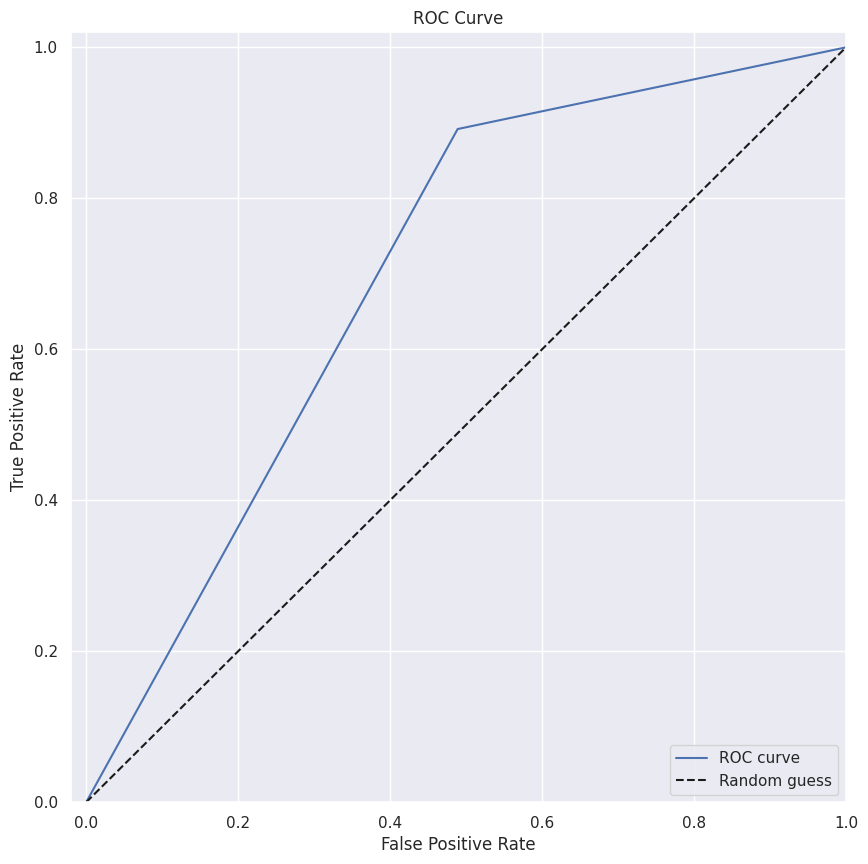

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

**LAB04**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
y = df_USA["success"]
features_success = ['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'natlty1','individual', 'weaptype1', 'nkill', 'nwound']
X = df_USA[features_success]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

[[ 23  20]
 [ 37 196]]


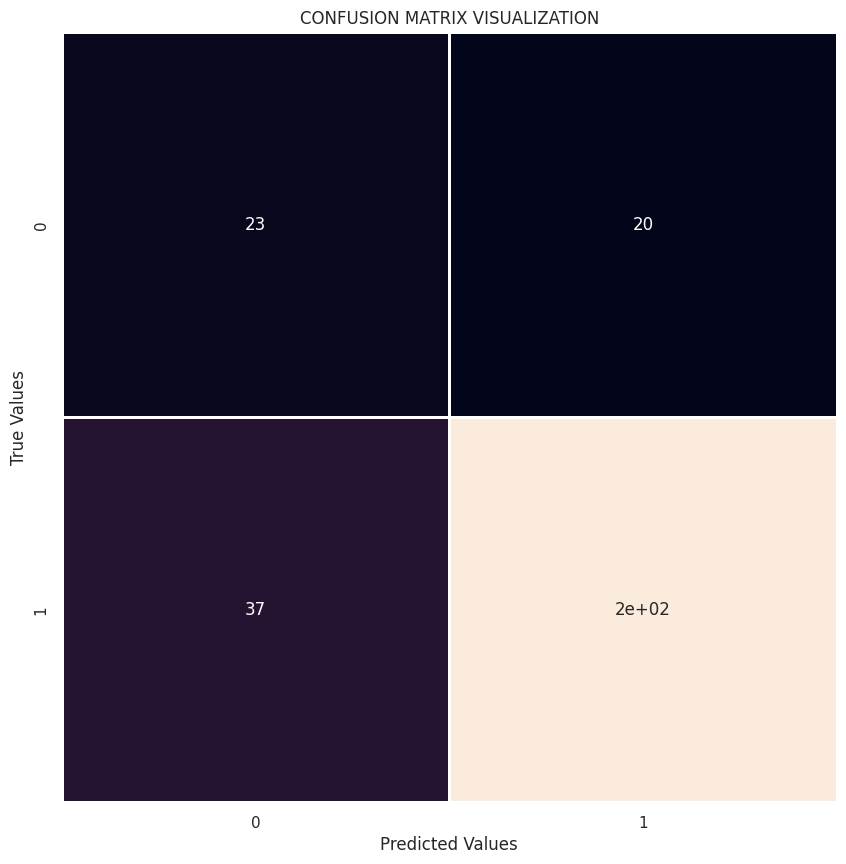

In [ ]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [ ]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       0.38      0.53      0.45        43
           1       0.91      0.84      0.87       233

    accuracy                           0.79       276
   macro avg       0.65      0.69      0.66       276
weighted avg       0.83      0.79      0.81       276



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.84
Precision: 0.84
Recall: 1.00
F1 Score: 0.92
Confusion Matrix:
[[  0  43]
 [  0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.84      1.00      0.92       233

    accuracy                           0.84       276
   macro avg       0.42      0.50      0.46       276
weighted avg       0.71      0.84      0.77       276



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve




In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
]

In [ ]:
# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Model: LogisticRegression
Accuracy: 0.84
Precision: 0.84
Recall: 1.00
F1 Score: 0.92
ROC-AUC: 0.50
Confusion Matrix:
[[  0  43]
 [  0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.84      1.00      0.92       233

    accuracy                           0.84       276
   macro avg       0.42      0.50      0.46       276
weighted avg       0.71      0.84      0.77       276



Model: DecisionTreeClassifier
Accuracy: 0.82
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
ROC-AUC: 0.69
Confusion Matrix:
[[ 22  21]
 [ 30 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.51      0.46        43
           1       0.91      0.87      0.89       233

    accuracy                           0.82       276
   macro avg       0.66      0.69      0.68       276
weighted avg       0.83      0.82      0.82       276



Model: Rando

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy: 0.84
Precision: 0.84
Recall: 1.00
F1 Score: 0.92
ROC-AUC: 0.50
Confusion Matrix:
[[  0  43]
 [  0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.84      1.00      0.92       233

    accuracy                           0.84       276
   macro avg       0.42      0.50      0.46       276
weighted avg       0.71      0.84      0.77       276



Model: KNeighborsClassifier
Accuracy: 0.81
Precision: 0.85
Recall: 0.94
F1 Score: 0.89
ROC-AUC: 0.53
Confusion Matrix:
[[  5  38]
 [ 14 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.85      0.94      0.89       233

    accuracy                           0.81       276
   macro avg       0.56      0.53      0.53       276
weighted avg       0.76      0.81      0.78       276



Model: GaussianNB
Accuracy: 0

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])



In [ ]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



In [ ]:
from sklearn.metrics import auc


[LightGBM] [Info] Number of positive: 2041, number of negative: 441
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 2482, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.822321 -> initscore=1.532150
[LightGBM] [Info] Start training from score 1.532150
[LightGBM] [Info] Number of positive: 2041, number of negative: 441
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 2482, number of used features: 12
[LightGBM] [Info] [binar

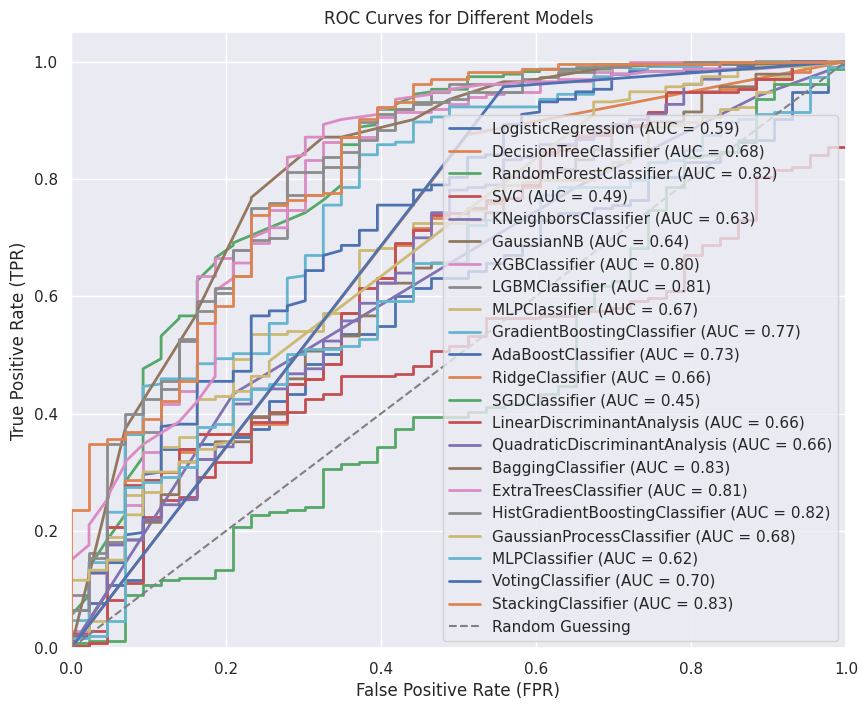

In [ ]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

**5 OTHER MODELS**

In [ ]:
# I have no applied 5 other models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
models=[
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier()

]

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

Model: SVC
Accuracy: 0.82
Precision: 0.82
Recall: 1.00
F1 Score: 0.90
ROC-AUC: 0.50
Confusion Matrix:
[[  0  97]
 [  0 455]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.82      1.00      0.90       455

    accuracy                           0.82       552
   macro avg       0.41      0.50      0.45       552
weighted avg       0.68      0.82      0.74       552



Model: KNeighborsClassifier
Accuracy: 0.79
Precision: 0.83
Recall: 0.94
F1 Score: 0.88
ROC-AUC: 0.52
Confusion Matrix:
[[ 11  86]
 [ 29 426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.11      0.16        97
           1       0.83      0.94      0.88       455

    accuracy                           0.79       552
   macro avg       0.55      0.52      0.52       552
weighted avg       0.73      0.79      0.75       552



Model: GaussianNB
Accuracy: 0

In [ ]:
!pip install evalml

In [ ]:
import evalml

In [ ]:
y = df_USA["success"]
features_success = ['imonth', 'iday', 'extended', 'latitude', 'longitude', 'multiple', 'suicide', 'attacktype1', 'targtype1', 'natlty1','individual', 'weaptype1', 'nkill', 'nwound']
X = df_USA[features_success]

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')

In [ ]:
X_train.head()

,imonth,iday,extended,latitude,longitude,multiple,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill,nwound
9441,9,18,0,716,910,1,0,2,1,48,0,4,0,0
99808,0,17,0,1060,284,0,0,2,13,48,0,4,0,0
9615,10,21,0,683,941,0,0,6,14,48,0,6,0,0
2631,11,8,0,57,752,1,0,2,19,48,0,4,0,0
51921,6,1,0,190,268,0,0,6,4,48,0,6,0,0


In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

[LightGBM] [Info] Number of positive: 242, number of negative: 970
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1212, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199670 -> initscore=-1.388358
[LightGBM] [Info] Start training from score -1.388358
[LightGBM] [Info] Number of positive: 242, number of negative: 970
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 1212, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199670 -> initscore=-1.388358
[LightGBM] [Info] Start training from score -1.388358
[LightGBM] [Info] Nu

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 11.167179107666016,
  'Total time of batch': 11.327938079833984},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 6.924665689468384,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 3.8642220497131348,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 2.2998015880584717,
  'XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 4.098370790481567,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 2.7245028018951416,
  'Total time of batch': 21.10392117500305}}

In [ ]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.442777,0.442777,0.006226,92.997533,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.450279,0.450279,0.003467,92.878899,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.465876,0.465876,0.009139,92.632237,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.465912,0.465912,0.009184,92.631665,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.474095,0.474095,0.009356,92.502243,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.530449,0.530449,0.027948,91.611012,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,6.323164,6.323164,0.004962,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'RF Classifier Select From Model': ['RF Classifier Select From Model', 'Oversampler.x', 'Oversampler.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'RF Classifier Select From Model.x', 'Oversampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'RF Classifier Select From Model':{'number_features': None, 'n_estimators': 10, 'max_depth': None, 'percent_features': 0.5, 'threshold': 'median', 'n_jobs': -

In [ ]:
best_pipeline=automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:4. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


5. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:5. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 11.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 11.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.444       0.117 0.275 0.638      0.225 0.323                     0.577            0.579      1,470          736
1                      0.436       0.249 0.333 0.667      0.421 0.357                     0.610            0.804      1,471          735
2                      0.448       0.121 0.234 0.617      0.220 0.329                     0.580            0.533      1,471          735
mean                   0.443       0.162 0.281 0.641      0.289 0.336                     0.589            0.639          -            -
std                    0.006       0.075 0.050 0.025      0.115 0.018                     0.018            0.145          -            -
coef of var            0.014       0.460 0.177 0.039      0.397 0.054                     0.031            0.227          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.444       0.117 0.275 0.638      0.225 0.323                     0.577            0.579      1,470          736
1                      0.436       0.249 0.333 0.667      0.421 0.357                     0.610            0.804      1,471          735
2                      0.448       0.121 0.234 0.617      0.220 0.329                     0.580            0.533      1,471          735
mean                   0.443       0.162 0.281 0.641      0.289 0.336                     0.589            0.639          -            -
std                    0.006       0.075 0.050 0.025      0.115 0.018                     0.018            0.145          -            -
coef of var            0.014       0.460 0.177 0.039      0.397 0.054                     0.031            0.227          -    

In [ ]:
 best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.6613571995015294),
             ('F1', 0.9012096774193548),
             ('Precision', 0.8324022346368715),
             ('Recall', 0.9824175824175824)])

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 11.256429433822632,
  'Total time of batch': 11.414719820022583}}

In [ ]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.640521,0.640521,0.024876,14.052086,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:4. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


5. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:5. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 11.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 11.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.638 0.323      0.225      1,470          736
1           0.667 0.357      0.421      1,471          735
2           0.617 0.329      0.220      1,471          735
mean        0.641 0.336      0.289          -            -
std         0.025 0.018      0.115          -            -
coef of var 0.039 0.054      0.397          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.638 0.323      0.225      1,470          736
1           0.667 0.357      0.421      1,471          735
2           0.617 0.329      0.220      1,471          735
mean        0.641 0.336      0.289          -            -
std         0.025 0.018      0.115          -            -
coef of var 0.039 0.054      0.397          -            -


In [ ]:
best_pipeline_auc = automl_auc.best_pipeline

In [ ]:
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.6613571995015294)])

In [ ]:
best_pipeline.save("model.pkl")

In [ ]:
check_model=automl.load('model.pkl')

In [ ]:
df1=pd.DataFrame(check_model.predict_proba(X_test))
df1

,0,1
11375,0.228497,0.771503
3428,0.656889,0.343111
3561,0.170286,0.829714
16222,0.391602,0.608398
5869,0.166383,0.833617
...,...,...
4474,0.182314,0.817686
1324,0.265257,0.734743
77450,0.205771,0.794229
50246,0.300699,0.699301


**LAB05**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)


In [3]:
df=pd.read_csv('/content/globalterrorismdb_shorter.csv',encoding = "ISO-8859-1")

In [4]:
df_USA = df[df.country == 217]


In [5]:
df_USA = df_USA.drop([ 'region', 'country', 'country_txt','claimed', 'nkillter', 'nwoundte'],axis=1)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


for col in df_USA.columns:
    if df_USA[col].dtype == 'object':
        df_USA[col] = le.fit_transform(df_USA[col])

In [7]:
for i in df_USA.columns:

    df_USA[i] = df_USA[i].fillna(df_USA[i].mean())

In [8]:
df_USA

,eventid,iyear,imonth,iday,extended,region_txt,provstate,city,latitude,longitude,...,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
5,197001010002,1970,1,1,0,0,13,76,37.005105,-89.176269,...,5.0,22,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,7
7,197001020002,1970,1,2,0,0,4,346,37.805065,-122.273024,...,16.0,21,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,7
8,197001020003,1970,1,2,0,0,51,281,43.076592,-89.412488,...,19.0,11,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,7
9,197001030001,1970,1,3,0,0,51,281,43.072950,-89.386694,...,20.0,5,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,7
10,197001050001,1970,1,1,0,0,51,32,43.468500,-89.744299,...,16.0,21,0.0,0.0,0.0,3.000000,1,0.0,-10.557692,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68040,199808210005,1998,8,21,0,0,35,108,39.961960,-83.002984,...,20.0,5,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,0
68078,199809080004,1998,9,8,0,0,33,164,35.054495,-78.877579,...,18.0,0,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,0
68079,199809080005,1998,9,8,0,0,33,164,35.054495,-78.877579,...,18.0,0,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,0
68112,199809210002,1998,9,21,0,0,4,18,40.867430,-124.085154,...,20.0,5,0.0,0.0,1.0,3.000000,1,0.0,-10.557692,5


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_USA)

In [10]:
scaled_data

array([[-1.02522993e+00, -1.01902357e+00, -1.51317539e+00, ...,
        -1.64987035e-01, -2.43338268e-16, -2.11636201e-01],
       [-1.02521766e+00, -1.01902357e+00, -1.51317539e+00, ...,
        -1.64987035e-01, -2.43338268e-16, -2.11636201e-01],
       [-1.02521766e+00, -1.01902357e+00, -1.51317539e+00, ...,
        -1.64987035e-01, -2.43338268e-16, -2.11636201e-01],
       ...,
       [ 2.41926963e+00,  2.41657216e+00,  8.35053851e-01, ...,
        -1.64987035e-01, -2.43338268e-16, -2.78929773e+00],
       [ 2.41942909e+00,  2.41657216e+00,  8.35053851e-01, ...,
        -1.64987035e-01, -2.43338268e-16, -9.48110924e-01],
       [ 2.41942909e+00,  2.41657216e+00,  8.35053851e-01, ...,
        -1.64987035e-01, -2.43338268e-16, -9.48110924e-01]])

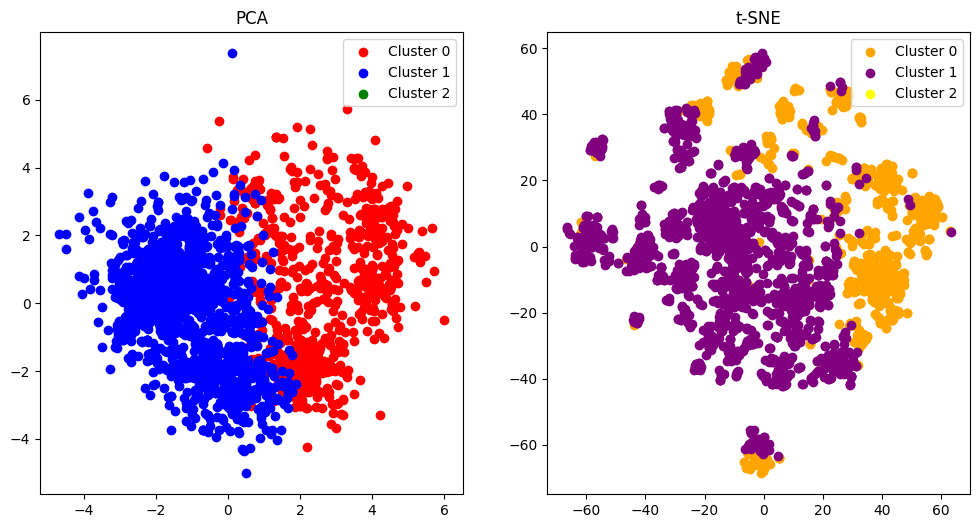

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you already have your PCA and t-SNE results
# pca_result = ...
# tsne_result = ...

# Define custom colors for your clusters
pca_colors = ['red', 'blue', 'green']  # Add more colors if you have more clusters
tsne_colors = ['orange', 'purple', 'yellow']  # Add more colors if you have more clusters

plt.figure(figsize=(12, 6))

# Plot PCA
plt.subplot(1, 2, 1)
for i in range(len(pca_colors)):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], c=pca_colors[i], label=f'Cluster {i}')
plt.title("PCA")
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for i in range(len(tsne_colors)):
    plt.scatter(tsne_result[labels == i, 0], tsne_result[labels == i, 1], c=tsne_colors[i], label=f'Cluster {i}')
plt.title("t-SNE")
plt.legend()

plt.show()


In [11]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(df_USA['success'].values, labels)
adjusted_rand = adjusted_rand_score(df_USA['success'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(df_USA['success'].values, labels)
v_measure = v_measure_score(df_USA['success'].values, labels)
completeness = completeness_score(df_USA['success'].values, labels)
homogeneity = homogeneity_score(df_USA['success'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")


Silhouette Score: 0.1088
Calinski-Harabasz Score: 152.2256
Davies-Bouldin Score: 3.3379
Normalized Mutual Info: 0.0161
Adjusted Rand Index: -0.0410
Adjusted Mutual Info: 0.0157
V-Measure: 0.0161
Completeness Score: 0.0140
Homogeneity Score: 0.0188


In [14]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score

)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, df_USA, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(df_USA['success'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(df_USA['success'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(df_USA['success'].values, labels),
        'V-Measure': v_measure_score(df_USA['success'].values, labels),
        'Completeness Score': completeness_score(df_USA['success'].values, labels),
        'Homogeneity Score': homogeneity_score(df_USA['success'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    # SpectralClustering(n_clusters=2),
    # SpectralClustering(n_clusters=3)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, df_USA, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()


Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1088
Calinski-Harabasz Score: 152.2256
Davies-Bouldin Score: 3.3379
Normalized Mutual Info: 0.0161
Adjusted Rand Index: -0.0410
Adjusted Mutual Info: 0.0157
V-Measure: 0.0161
Completeness Score: 0.0140
Homogeneity Score: 0.0188

Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.0887
Calinski-Harabasz Score: 139.6053
Davies-Bouldin Score: 2.6267
Normalized Mutual Info: 0.0048
Adjusted Rand Index: -0.0028
Adjusted Mutual Info: 0.0041
V-Measure: 0.0048
Completeness Score: 0.0038
Homogeneity Score: 0.0064

Model: AgglomerativeClustering
Silhouette Score: 0.4129
Calinski-Harabasz Score: 114.6998
Davies-Bouldin Score: 0.9232
Normalized Mutual Info: 0.0006
Adjusted Rand Index: -0.0068
Adjusted Mutual Info: -0.0002
V-Measure: 0.0006
Completeness Score: 0.0021
Homogeneity Score: 0.0004

Model: AgglomerativeClustering
Silhouette Score: 0.1809
Calinski-Harabasz Score: 119.9236
Davies-Bouldin Score: 2.6230
Normalized Mutual Info: 0.0052
Adjusted Rand Index: -0.0392
Adjusted Mutual Info: 0.0043
V-Measure: 0.0052
Completeness Score: 0.0047
Homogeneity Score: 0.0057



In [15]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [16]:
df_res

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),0.108840,152.225610,3.337880,0.016082,-0.040984,0.015680,0.016082,0.014041,0.018818
KMeans(n_clusters=3),0.088674,139.605333,2.626680,0.004797,-0.002780,0.004070,0.004797,0.003842,0.006386
AgglomerativeClustering(),0.412918,114.699806,0.923207,0.000608,-0.006775,-0.000239,0.000608,0.002104,0.000355
AgglomerativeClustering(n_clusters=3),0.180872,119.923584,2.622981,0.005170,-0.039197,0.004293,0.005170,0.004721,0.005714


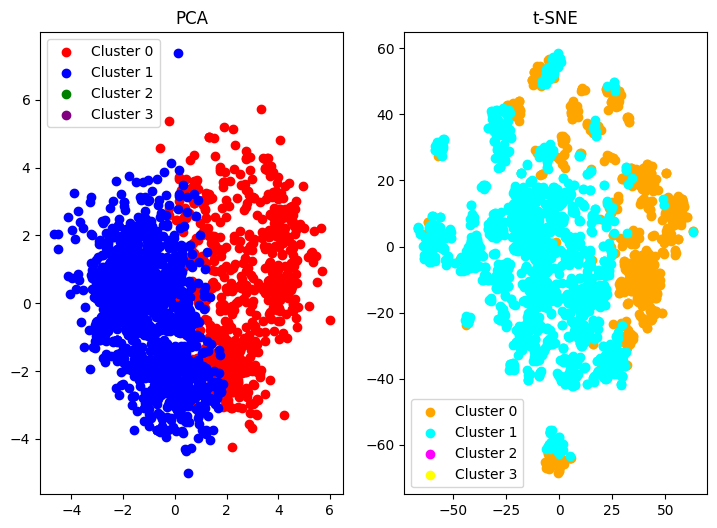

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import MeanShift

# Assuming you already have your PCA and t-SNE results
# pca_result = ...
# tsne_result = ...

# Define custom colors for your clusters
pca_colors = ['red', 'blue', 'green', 'purple']  # Add more colors if you have more clusters
tsne_colors = ['orange', 'cyan', 'magenta', 'yellow']  # Add more colors if you have more clusters
hierarchical_colors = ['pink', 'lime', 'brown', 'gray']  # Add more colors if you have more clusters
dbscan_colors = ['violet', 'turquoise', 'gold']  # Add more colors if you have more clusters
mean_shift_colors = ['brown', 'lime', 'gray', 'pink']

plt.figure(figsize=(18, 6))

# Plot PCA
plt.subplot(1, 4, 1)
for i in range(len(pca_colors)):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], c=pca_colors[i], label=f'Cluster {i}')
plt.title("PCA")
plt.legend()

# Plot t-SNE
plt.subplot(1, 4, 2)
for i in range(len(tsne_colors)):
    plt.scatter(tsne_result[labels == i, 0], tsne_result[labels == i, 1], c=tsne_colors[i], label=f'Cluster {i}')
plt.title("t-SNE")
plt.legend()






plt.show()


In [26]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, df_USA, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(df_USA['success'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(df_USA['success'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(df_USA['success'].values, labels),
        'V-Measure': v_measure_score(df_USA['success'].values, labels),
        'Completeness Score': completeness_score(df_USA['success'].values, labels),
        'Homogeneity Score': homogeneity_score(df_USA['success'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    DBSCAN(eps=0.5, min_samples=5),
    MeanShift()

    # SpectralClustering(n_clusters=2),
    # SpectralClustering(n_clusters=3),
    # Add two more clustering models here
    # For example:


]

lx = []

# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, df_USA, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()


Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1088
Calinski-Harabasz Score: 152.2256
Davies-Bouldin Score: 3.3379
Normalized Mutual Info: 0.0161
Adjusted Rand Index: -0.0410
Adjusted Mutual Info: 0.0157
V-Measure: 0.0161
Completeness Score: 0.0140
Homogeneity Score: 0.0188

Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1239
Calinski-Harabasz Score: 140.2717
Davies-Bouldin Score: 2.5218
Normalized Mutual Info: 0.0161
Adjusted Rand Index: -0.0410
Adjusted Mutual Info: 0.0153
V-Measure: 0.0161
Completeness Score: 0.0134
Homogeneity Score: 0.0201

Model: AgglomerativeClustering
Silhouette Score: 0.4129
Calinski-Harabasz Score: 114.6998
Davies-Bouldin Score: 0.9232
Normalized Mutual Info: 0.0006
Adjusted Rand Index: -0.0068
Adjusted Mutual Info: -0.0002
V-Measure: 0.0006
Completeness Score: 0.0021
Homogeneity Score: 0.0004

Model: AgglomerativeClustering
Silhouette Score: 0.1809
Calinski-Harabasz Score: 119.9236
Davies-Bouldin Score: 2.6230
Normalized Mutual Info: 0.0052
Adjusted Rand Index: -0.0392
Adjusted Mutual Info: 0.0043
V-Measure: 0.0052
Completeness Score: 0.0047
Homogeneity Score: 0.0057

Model: DBSCAN
Silhouette Score: -0.2303
Calinski-Harabasz Score: 2.7065
Davies-Bouldin Score: 1.3433
Normalized Mutual Info: 0.0063
Adjusted Rand Index: -0.0133
Adjusted Mutual Info: 0.0023


In [27]:
df_res1 = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [28]:
df_res1

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),0.108840,152.225610,3.337880,0.016082,-0.040984,0.015680,0.016082,0.014041,0.018818
KMeans(n_clusters=3),0.123939,140.271717,2.521789,0.016085,-0.040987,0.015319,0.016085,0.013402,0.020110
AgglomerativeClustering(),0.412918,114.699806,0.923207,0.000608,-0.006775,-0.000239,0.000608,0.002104,0.000355
AgglomerativeClustering(n_clusters=3),0.180872,119.923584,2.622981,0.005170,-0.039197,0.004293,0.005170,0.004721,0.005714
DBSCAN(),-0.230286,2.706473,1.343286,0.006308,-0.013320,0.002338,0.006308,0.026342,0.003583
MeanShift(),0.249636,18.493089,0.739769,0.018793,-0.012950,-0.002851,0.018793,0.019586,0.018061


<ipython-input-33-25f7c4619d5f>:62: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 5)


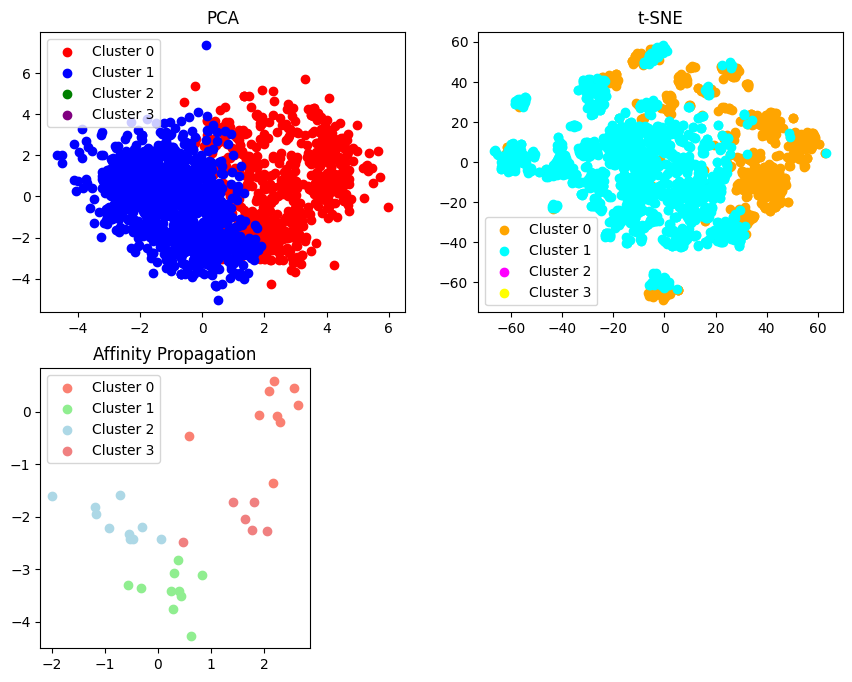

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.cluster import AffinityPropagation

# Create an instance of the AffinityPropagation model
affinity_propagation = AffinityPropagation()

# Fit the model to your data
affinity_propagation.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = affinity_propagation.labels_

# Assuming you already have your PCA and t-SNE results
# pca_result = ...
# tsne_result = ...

# Define custom colors for your clusters
pca_colors = ['red', 'blue', 'green', 'purple']  # Add more colors if you have more clusters
tsne_colors = ['orange', 'cyan', 'magenta', 'yellow']  # Add more colors if you have more clusters

plt.figure(figsize=(16, 8))

# Plot PCA
plt.subplot(2, 3, 1)
for i in range(len(pca_colors)):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], c=pca_colors[i], label=f'Cluster {i}')
plt.title("PCA")
plt.legend()

# Plot t-SNE
plt.subplot(2, 3, 2)
for i in range(len(tsne_colors)):
    plt.scatter(tsne_result[labels == i, 0], tsne_result[labels == i, 1], c=tsne_colors[i], label=f'Cluster {i}')
plt.title("t-SNE")
plt.legend()

# Perform Mean Shift clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_data)

# Define custom colors for Mean Shift clusters
mean_shift_colors = ['brown', 'lime', 'gray', 'pink']  # Add more colors if you have more clusters

# Plot Mean Shift
plt.subplot(2, 3, 4)
for i in range(len(mean_shift_colors)):
    plt.scatter(pca_result[mean_shift_labels == i, 0], pca_result[mean_shift_labels == i, 1], c=mean_shift_colors[i], label=f'Cluster {i}')
plt.title("Mean Shift")
plt.legend()

# # Perform Affinity Propagation clustering
affinity_propagation = AffinityPropagation()
affinity_propagation_labels = affinity_propagation.fit_predict(scaled_data)

# Define custom colors for Affinity Propagation clusters
affinity_propagation_colors = ['salmon', 'lightgreen', 'lightblue', 'lightcoral']  # Add more colors if you have more clusters

# Plot Affinity Propagation
plt.subplot(2, 4, 5)
for i in range(len(affinity_propagation_colors)):
    plt.scatter(pca_result[affinity_propagation_labels == i, 0], pca_result[affinity_propagation_labels == i, 1], c=affinity_propagation_colors[i], label=f'Cluster {i}')
plt.title("Affinity Propagation")
plt.legend()
plt.show()


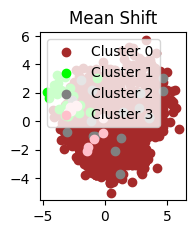

In [34]:
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(scaled_data)

# Define custom colors for Mean Shift clusters
mean_shift_colors = ['brown', 'lime', 'gray', 'pink']  # Add more colors if you have more clusters

# Plot Mean Shift
plt.subplot(2, 3, 4)
for i in range(len(mean_shift_colors)):
    plt.scatter(pca_result[mean_shift_labels == i, 0], pca_result[mean_shift_labels == i, 1], c=mean_shift_colors[i], label=f'Cluster {i}')
plt.title("Mean Shift")
plt.legend()
plt.show()